# CC05 (Mathematical Physics - 2) All Codes

> **Bessel Functions** (by available function, calculations and recurrence formula)

> **Legendre Polynomials** (by available function, calculations and recurrence formula)

> **Least Square Method**

> **Gauss Elimination Method**

> **Inverse of a matrix by Gauss elimination method**

> **Solving Differential Equations by Euler's method**

> **Modified Euler Method for solving ODE**

> **Euler's metod for 2nd order ODE** (example - damped harmonic oscillation)


# Bessel Functions

**Bessel's Differential Equation:**
$$ x^2y'' + xy' + (x^2-n^2)y = 0 $$

**Solution (Bessel Functions):**
$$ j_n(x) = \sum_{m=0}^{\infty} \frac{(-1)^m}{m! \Gamma(m+n+1)} \left(\frac{x}{2}\right)^{(2m+n)} $$ 

$$ j_{-n}(x) = (-1)^n j_n(x) $$

### from `scipy.special`

In [1]:
from scipy.special import *
jn(3,2)

0.12894324947440208

## By calculations

In [2]:
import numpy as np
from scipy.special import factorial

def besselfn(n,x):
    return sum([(-1)**m*(x/2)**(2*m+n)/(factorial(m)*factorial(m+n))
                for m in range(95)])
besselfn(3,2)

0.1289432494744021

We can get, $$ j_n(x) = \sum_{m=0}^{\infty} t_m $$

Where, $ \hspace{2mm} t_m = - \frac{1}{m(m+n)} (\frac{x}{2})^2 t_{m-1} \hspace{4mm} $ and $ \hspace{4mm} t_0 = \frac{(x/2)^n}{n!} $.

In [3]:
def fact(n):
    fct = 1
    for i in range(2,n+1):
        fct *= i
    return fct

In [4]:
def besfn(nn,x):
    n = abs(nn)
    tol = 1e-5
    t = (x/2)**n/fact(n)  # t_0
    sm = t
    m = 1
    while True:
        sm1 = sm
        t = -(x/2)**2*t/(m*(m+n))
        sm += t
        m += 1
        if abs(sm - sm1) < tol:
            break
    if nn < 0:    # j_-n(x)
        sm = (-1)**n*sm
    return sm

In [5]:
besfn(3,2)

0.1289434523809524

### By recurrence formula

$$ j_{n+1}(x) = \frac{2x}{n} j_n(x) - j_{n-1}(x)  $$
For given $j_0(x)$ and $j_1(x)$.

In [6]:
from scipy.special import jn

def recjn(n,x):
    if n == 0:
        return jn(0,x)
    elif n == 1:
        return jn(1,x)
    elif n >= 2:
        jn0, jnmin1 = jn(1,x), jn(0,x)
        for i in range(2,n+1):
            jn1 = 2*(i-1)/x*jn0 - jnmin1
            jnmin1 = jn0
            jn0 = jn1
        return jn1

In [7]:
recjn(3,2)

0.1289432494744024

**Verification**

In [8]:
n1, x1 = 5,-2  # input values
print('by using function in scipy.special\n\t',jn(n1,x1))
print('by calculations\n\t',besfn(n1,x1))
print('by recurrence formula\n\t',recjn(n1,x1))

by using function in scipy.special
	 -0.007039629755871686
by calculations
	 -0.007039517195767195
by recurrence formula
	 -0.007039629755874244


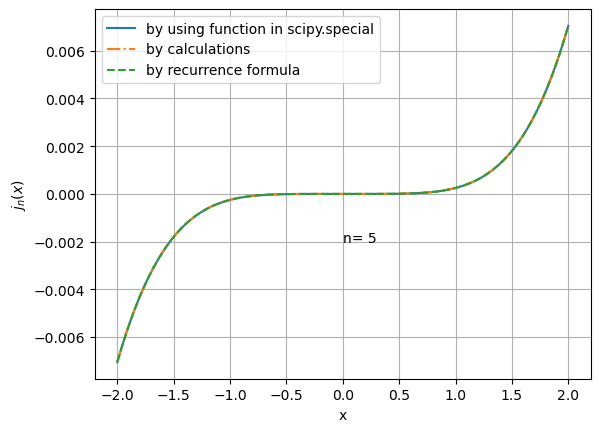

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-2,2,100)
n = 5  # input the value
jn1 = jn(n,x)
besfn1 = [besfn(n,x[i]) for i in range(len(x))]
recjn1 = [recjn(n,x[i]) for i in range(len(x))]

plt.plot(x,jn1,'-',label='by using function in scipy.special')
plt.plot(x,besfn1,'-.',label='by calculations')
plt.plot(x,recjn1,'--',label='by recurrence formula')
plt.text((max(x)-abs(min(x)))/2,(max(jn1)-abs(min(jn1)))/3-2e-3,f'n= {n}')
plt.legend()
plt.xlabel('x')
plt.ylabel('$j_n(x)$')
plt.grid()
plt.show()

# Legendre Polynomials

**Legendre's Differential Equation:** $$ (1-x^2)y'' - 2xy' + n(n+1)y = 0 $$

**Solution (Legendre Polynomials):** $$ P_n(x) = \sum_{k=0}^{m} (-1)^k \frac{(2n-2k)!}{2^n k! (n-k)!(n-2k)!} \, x^{n-2k} $$

For $n=even$, $m=\frac{n}{2}$ and for $n=odd$, $m=\frac{n-1}{2}$.

### from `scipy.special`

In [10]:
from scipy.special import legendre
legendre(3)(5)

305.0

## By calculations

In [11]:
def fact(n):
    fct = 1
    for i in range(2,n+1):
        fct *= i
    return fct

In [12]:
def Pn(n,x):
    trm = 0
    m = n//2  # for both even and odd n
    for k in range(0,m+1):
        trm += (-1)**k*fact(2*n-2*k)*x**(n-2*k)/(2**n*fact(k)*fact(n-k)*fact(n-2*k))
    return trm

In [13]:
Pn(3,5)

305.0

### By recurrence formula

$$ P_n(x) = \frac{2n-1}{n} xP_{n-1}(x) - \frac{n-1}{n} P_{n-2}(x) $$
Given, $P_0(x)=1$ and $P_1(x)=x$.

In [14]:
def recPn(n,x):
    P0 = 1
    P1 = x
    if n==0:
        Pn = P0
    elif n==1:
        Pn = P1
    else:
        Pn_1, Pn_2 = P1, P0
    for i in range(2,n+1):
        Pn = (2*i-1)/i*x*Pn_1 - (i-1)/i*Pn_2
        Pn_1, Pn_2 = Pn, Pn_1
    return Pn

In [15]:
recPn(3,5)

305.00000000000006

**Verification**

In [16]:
n1, x1 = 5,-1.5  # input values
print('by using function in scipy.special\n\t',legendre(n1)(x1))
print('by calculations\n\t',Pn(n1,x1))
print('by recurrence formula\n\t',recPn(n1,x1))

by using function in scipy.special
	 -33.08203125000001
by calculations
	 -33.08203125
by recurrence formula
	 -33.08203125


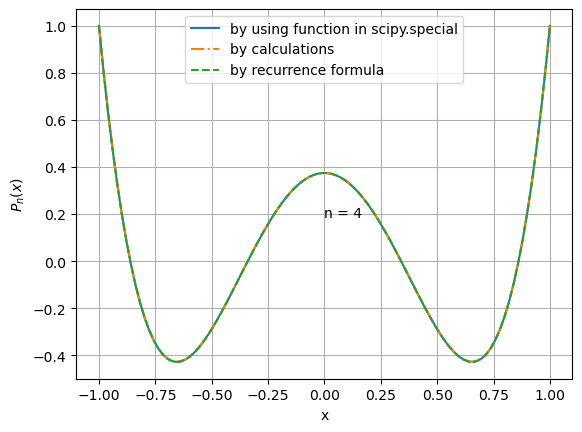

In [17]:
import numpy as np
import matplotlib.pyplot as plt

n = 4   # input degree of the polynomial
x = np.linspace(-1,1,100)
legplot = legendre(n)(x)
Pnplot = [Pn(n,x[i]) for i in range(len(x))]
recPnplot = [recPn(n,x[i]) for i in range(len(x))]

plt.plot(x,legplot,label='by using function in scipy.special')
plt.plot(x,Pnplot,'-.',label='by calculations')
plt.plot(x,recPnplot,'--',label='by recurrence formula')
plt.text((max(x)-abs(min(x)))/2,(max(legplot)-abs(min(legplot)))/3-2e-3,f'n = {n}')
plt.legend()
plt.xlabel('x')
plt.ylabel('$P_n(x)$')
plt.grid()
plt.show()

# Least Square Method

We want to obtain a straight line $ y = a_0 + a_1x $ from a given datset of points $(x_i,y_i)$.

Slope of the straight line will be, $ a_1 = \frac{\sum x_i y_i - n\bar{x}\bar{y}}{\sum x_i^2 - n\bar{x}^2} = \frac{S_{xy}}{S_{xx}} $

y intercept of the straight line will be,  $ a_0 = \bar{y} - a_1 \bar{x} $

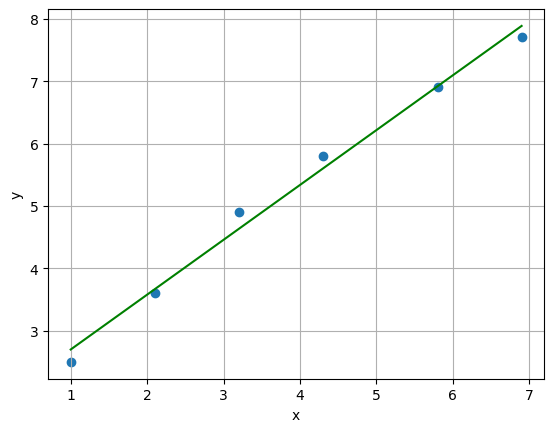

slope = 0.8789561726329876
y intercept = 1.8200535296085638


In [18]:
import matplotlib.pyplot as plt
x = [1, 2.1, 3.2, 4.3, 5.8, 6.9]
y = [2.5, 3.6, 4.9, 5.8, 6.9, 7.7]
yfit = []
n = len(x)
xav = sum(x)/n
yav = sum(y)/n
Sxy = sum((i-xav)*(j-yav) for i,j in zip(x,y))
Sxx = sum((i-xav)**2 for i in x)
a1 = Sxy/Sxx
a0 = yav - a1*xav
yfit = [a0 + a1*i for i in x]
plt.scatter(x,y)
plt.plot(x, yfit, color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()
print('slope =', a1)
print('y intercept =', a0)

# Gauss Elimination Method

To solve system of linear equations we use Gauss Elimination.
$$ AX = B $$
Here, we make the *Echelon* form of the matrix A. After that, we can solve the equations by *Back Substitution*. In this we make the matrix $A$ a identity matrix in $[A|B]$ by *Row Operations* and get the solution as matrix $B$ after the whole process.

In [19]:
def GaussElim(A):
    n = len(A)
    a = [[A[i][j] for j in range(len(A[0]))] for i in range(n)]
    for i in range(n-1):
        mxa = a[i][i]
        m = i
        for j in range(i+1,n):
            if abs(a[j][i])>mxa:
                mxa = abs(a[j][i])  # finding the maximum element
                m = j
        ta = a[i]
        a[i] = a[m]
        a[m] = ta

        for j in range(i+1,n):
            cf = a[j][i]/a[i][i]
            for k in range(n+1):
                a[j][k] = a[j][k] - cf*a[i][k]                
# Back substitution
    X = [0.0 for i in range(n)]
    X[n-1] = a[n-1][n]/a[n-1][n-1]
    for i in range(n-2,-1,-1):
        sm = 0.0
        for j in range(i+1,n):
            sm += a[i][j]*X[j]
        X[i] = 1.0/a[i][i]*(a[i][n]-sm)
    return X

# Put the matrix
AB = [[-5,16,-4,0],[10,-5,0,12],[0,-4,11,0]]
X = GaussElim(AB)
print('X =', X)

X = [1.449056603773585, 0.49811320754716976, 0.1811320754716981]


**Question:** Solve the equations:

$$ 3x + 2y + 4z = 7 $$

$$ 2x + y + z = 4 $$

$$ x + 3y + 5z = 2 $$

**Solution:**

In [20]:
def GaussElim(A):
    n = len(A)
    a = [[A[i][j] for j in range(len(A[0]))] for i in range(n)]
    for i in range(n-1):
        mxa = a[i][i]
        m = i
        for j in range(i+1,n):
            if abs(a[j][i])>mxa:
                mxa = abs(a[j][i])  # finding the maximum element
                m = j
        ta = a[i]
        a[i] = a[m]
        a[m] = ta

        for j in range(i+1,n):
            cf = a[j][i]/a[i][i]
            for k in range(n+1):
                a[j][k] = a[j][k] - cf*a[i][k]                
# Back substitution
    X = [0.0 for i in range(n)]
    X[n-1] = a[n-1][n]/a[n-1][n-1]
    for i in range(n-2,-1,-1):
        sm = 0.0
        for j in range(i+1,n):
            sm += a[i][j]*X[j]
        X[i] = 1.0/a[i][i]*(a[i][n]-sm)
    return X

# Putting the matrix
AB = [[3,2,4,7],[2,1,1,4],[1,3,5,2]]
X = GaussElim(AB)
print ('[x y z] =', X)

[x y z] = [2.25, -1.124999999999999, 0.6249999999999994]


## Inverse of a Matrix by Gauss Elimination Method

Here by Gauss Elimination we convert $[A|I]$ to $[I|A']$ where $A' = A^{-1}$.

In [21]:
def InvGaussElim(A):
    n = len(A)
    a = [[A[i][j] for j in range(n)] for i in range(n)]
    b = [[1.0 if i==j else 0.0 for j in range(n)] for i in range(n)]  # identity matrix
    for i in range(n):
        for j in range(n):
            if j!=i:    # operations on non-diagonal terms
                r = a[j][i]/a[i][i]
                for k in range(n):
                    a[j][k] = a[j][k] - r*a[i][k]
                    b[j][k] = b[j][k] - r*b[i][k]
    for i in range(n):
        for j in range(n):
            b[i][j] = b[i][j]/a[i][i]
    return b

# Put the matrix
A = [[2,5,6,8],[7,10,5,4],[1,3,4,8],[4,8,9,12]]
invA = InvGaussElim(A)
print(" \t Inverse of the Matrix A ")
for i in invA:
    for ii in i:
        print("%0.3f,"%ii,end=" ")   # all ii in same line
    print("")

 	 Inverse of the Matrix A 
-2.500, -0.167, -0.167, 1.833, 
2.000, 0.333, 0.333, -1.667, 
-0.250, -0.250, -0.750, 0.750, 
-0.312, 0.021, 0.396, 0.021, 


# Solving Differential Equation by Euler's Method

$$ \frac{dy}{dx} = f(x,y) $$

For n intervals between the integration limits $(x_0,x)$, $$ x_n = x_0 + nh, (n = 1,2,3,...) $$
By Euler's Formula, $$ y_{n+1} = y_n + hf(x_n, y_n) $$

**Algorithm:**

1. Define the function $f(x,y)$.
2. Set interval and initial values of x and y.
3. Update, $$ y = y + hf(x,y) $$  $$ x = x+h $$
    Iterate this in a loop.
4. Collect the (x,y) data.
5. Plot the graph.

**Question:** Plot $x-y$ graph for the differential equation,
$$ \frac{dy}{dx} = x^2 e^{-x/5} $$

**Python Program:**

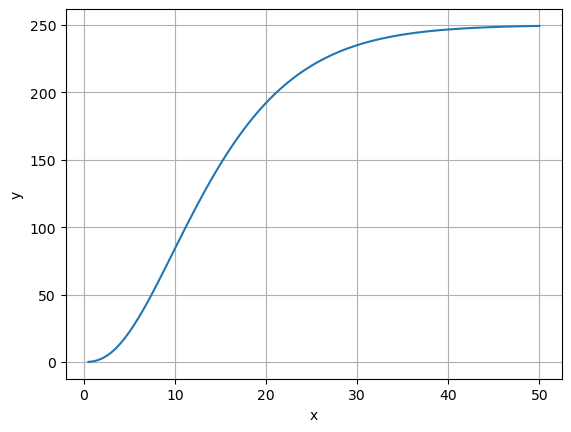

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def dydx(x,y):
    return x**2 * np.exp(-x/5)

x, y, h = 0, 0, 0.5
xx, yy = [], []
for i in range (100):
    x += h
    y += h*dydx(x,y)
    
    xx.append(x)
    yy.append(y)
    
plt.plot(xx,yy)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

##  Modified Euler Method to solve 1st Order Differential Equation

To get a better approximation by *trapezoidal rule*,
$$ y_{n+1} = y_0 + \frac{h}{2}[f(x_n, y_n) + f(x_{n+1}, y_{n+1})] $$
By applying iteration on this, we can get a better solution.

**Python Program:**

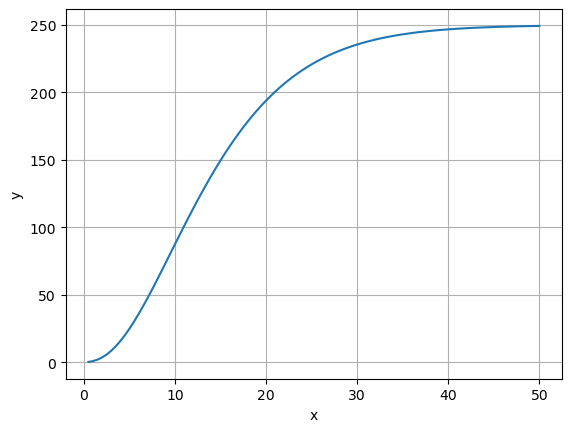

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def dydx(x,y):
    return x**2 * np.exp(-x/5)
    
x, y = 0, 0
h = 0.5
xx, yy = [], []

for i in range(100):
    x += h
    dydx1 = 0.5 * (dydx(x,y) + dydx(x + h, y + h*dydx(x,y)))
    y += dydx1*h
    xx.append(x), yy.append(y)


plt.plot(xx,yy)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## Euler Method for 2nd Order Differential Equation

**$$ ay'' + by' + c = 0; y'=\frac{dy}{dx} $$**

Let, $$ y' = z .......(1)$$ So, $$ az' + bz + c = 0 .......(2)$$

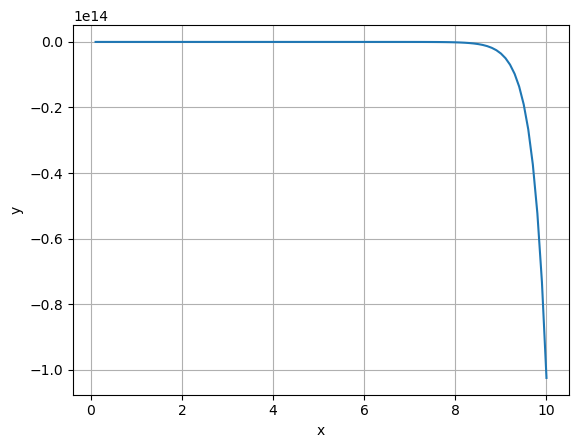

In [24]:
import matplotlib.pyplot as plt

pr = [1,-4,4]  # parameters = [a,b,c]
x,y,z = 0,0,0
dx = 0.1
xx, yy, zz = [], [], []

def dydx(x,y,z):
    return z
def dzdx(x,y,z):
    return (-1/pr[0]) * (pr[1]*z + pr[2])

for i in range(100):
    x = x + dx
    y = y + dx * dydx(x,y,z)
    z = z + dx * dzdx(x,y,z)
    
    xx.append(x)
    yy.append(y)
    zz.append(z)

plt.plot(xx,yy)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

### Example: Damped Harmonic Oscillation

$$ \frac{d^2y}{dt^2} + \lambda \frac{dy}{dt} +ky = 0 $$

Let, $$ \frac{dy}{dt} = z ......(1) $$
So, $$ \frac{dz}{dt} = -\lambda z -ky ......(2) $$

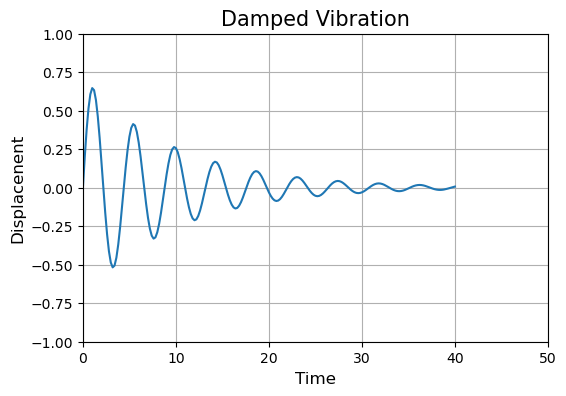

In [25]:
import matplotlib.pyplot as plt

pr = [0.2, 2]       # parameters = [lamda, k]
x, y, z = 0, 0, 1   # initial values
dx = 0.2 

def dydx(x,y,z): return z
def dzdx(x,y,z): return - pr[0]*z - pr[1]*y

xx, yy, zz = [x], [y], [z] 

for i in range(200):
    x += dx
    y += dydx(x,y,z) * dx
    z += dzdx(x,y,z) * dx
    
    xx.append(x)
    yy.append(y)
    zz.append(z)

plt.figure(figsize=(6,4))
plt.plot(xx, yy)
plt.xlabel('Time', size=12)
plt.ylabel('Displacenent', size=12)
plt.title('Damped Vibration', size=15)
plt.xlim(0, 50)
plt.ylim(-1, 1)
plt.grid()
plt.show()